In [3]:
import pandas as pd


In [15]:
# Load CSV file
file_path = "../data/sample_level_3_10k.csv"
data = pd.read_csv(file_path, delimiter=",")

In [17]:
# data inspection
print(data.head())
print(data.info())
print(data.describe())

# data cleaning
# check for missing values
print(f"Missing values: {data.isnull().sum()}")
# column names
print(data.columns)
# check for duplicates
print(f"Duplicates: {data.duplicated().sum()}")


   Unnamed: 0 first_name last_name         gender   salary     rent  age  \
0           0     Almira    Imholz  Gender.FEMALE  4660.65   969.65   79   
1           1     Charly    Tornay    Gender.MALE  8340.15  2292.25   58   
2           2     Amélie      Bebi  Gender.FEMALE     0.00     0.00   15   
3           3       Savo   Zumsteg    Gender.MALE  5197.95  1440.45   46   
4           4       Susy  Petrulli  Gender.FEMALE  4598.05   865.50   26   

   north_coord  east_coord  postal_code canton    street_name  locality_name  \
0      1268290     2627794         4310     AG    Alte Saline    Rheinfelden   
1      1171411     2633042         3800     BE  Brienzstrasse     Interlaken   
2      1263772     2681356         8182     ZH      Wybergweg     Hochfelden   
3      1184394     2577307         1700     FR  Route du Jura       Fribourg   
4      1200606     2603345         3072     BE    Poststrasse  Ostermundigen   

    building_category house_number    height      weight      

In [6]:
# plot data distributions
# col Index(['gender', 'salary', 'rent', 'age', 'canton', 'lat', 'lon', 'height', 'weight', 'z1', 'z2'],




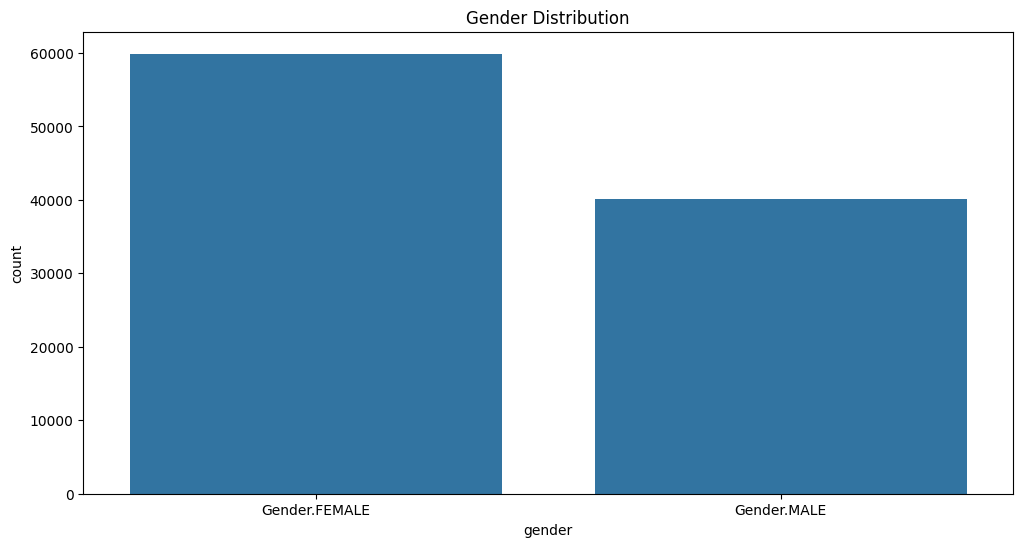

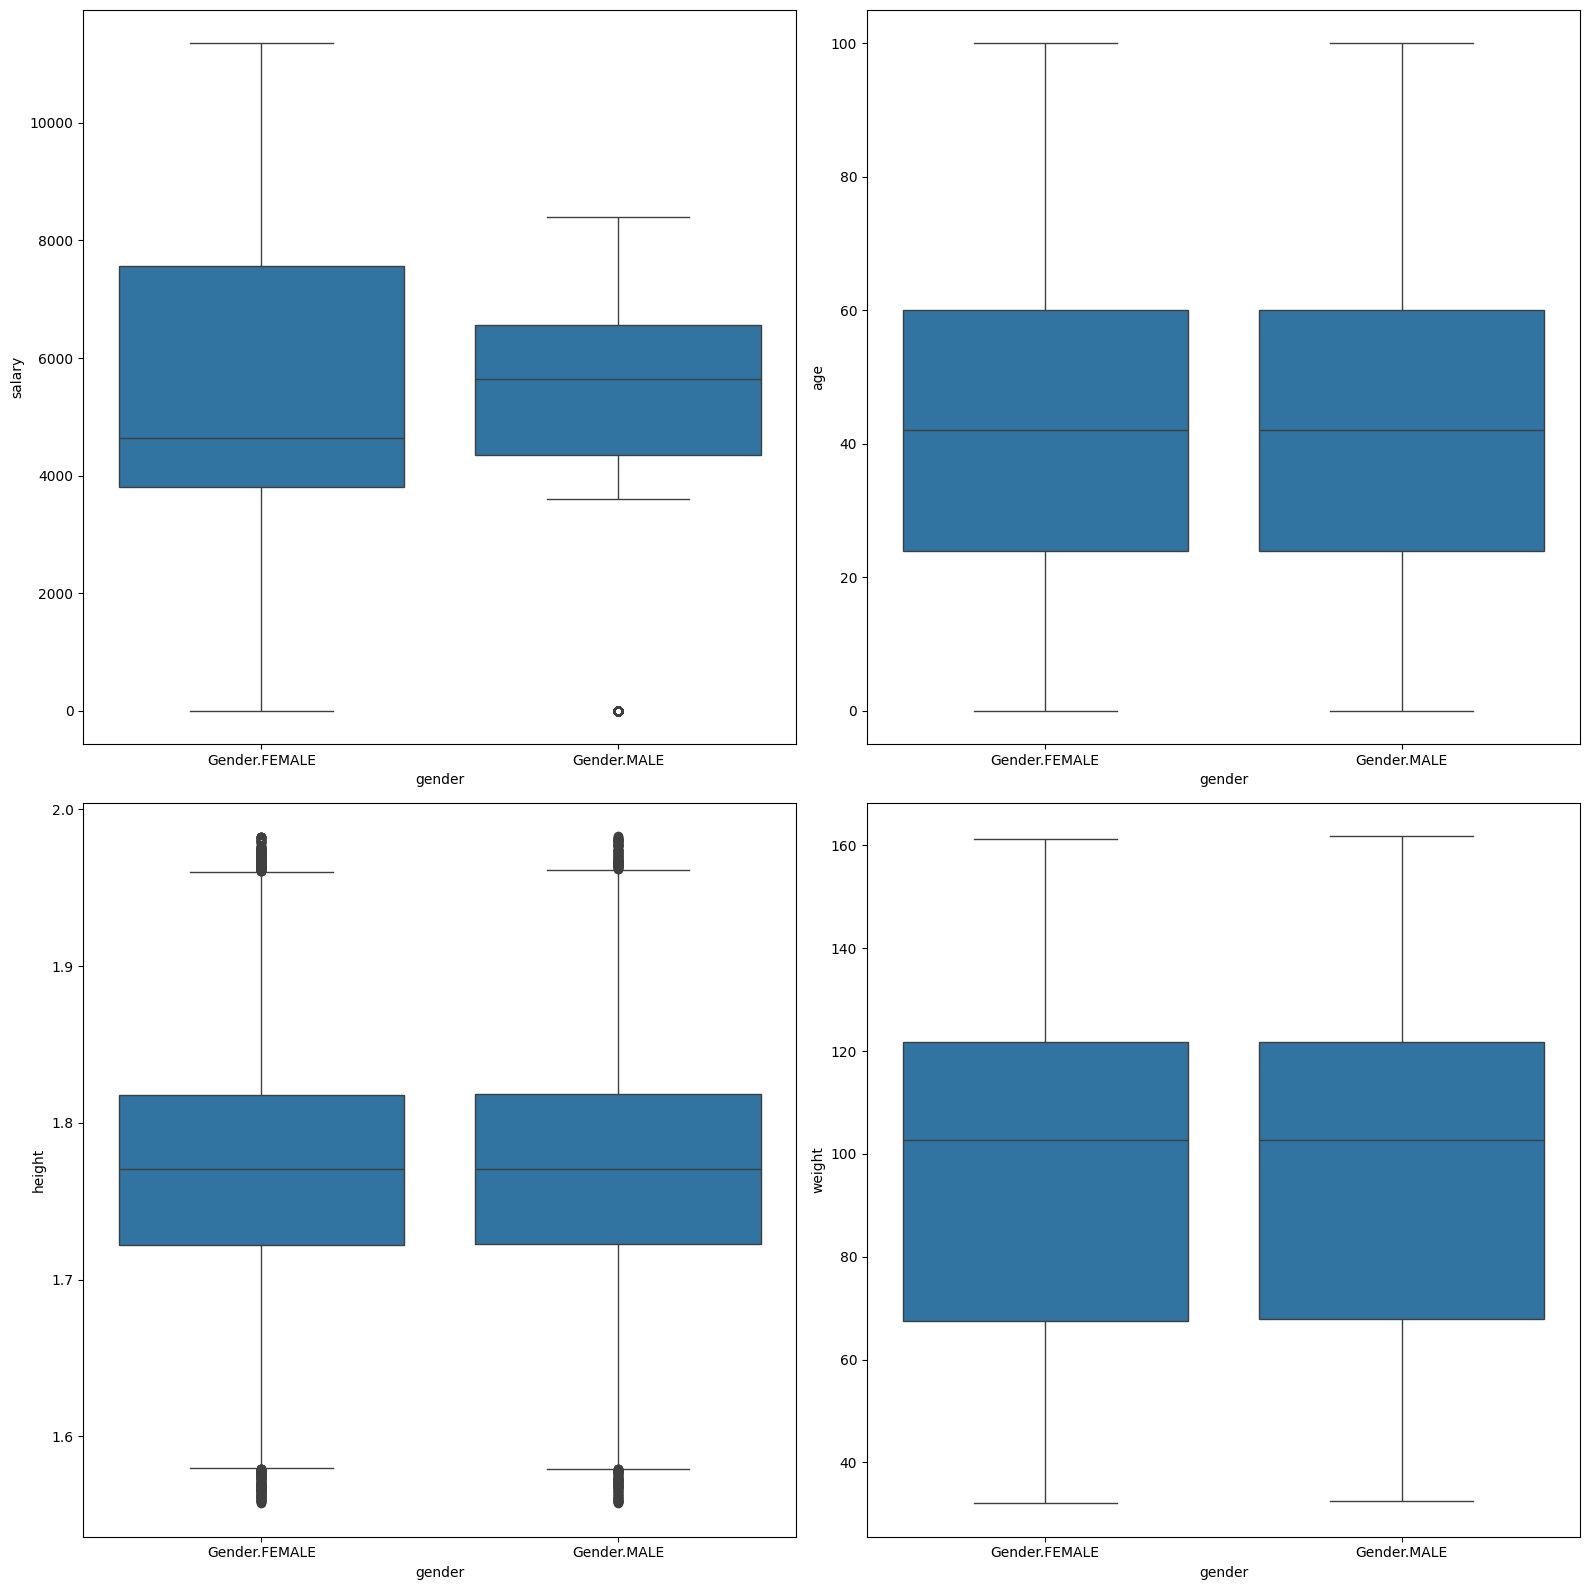

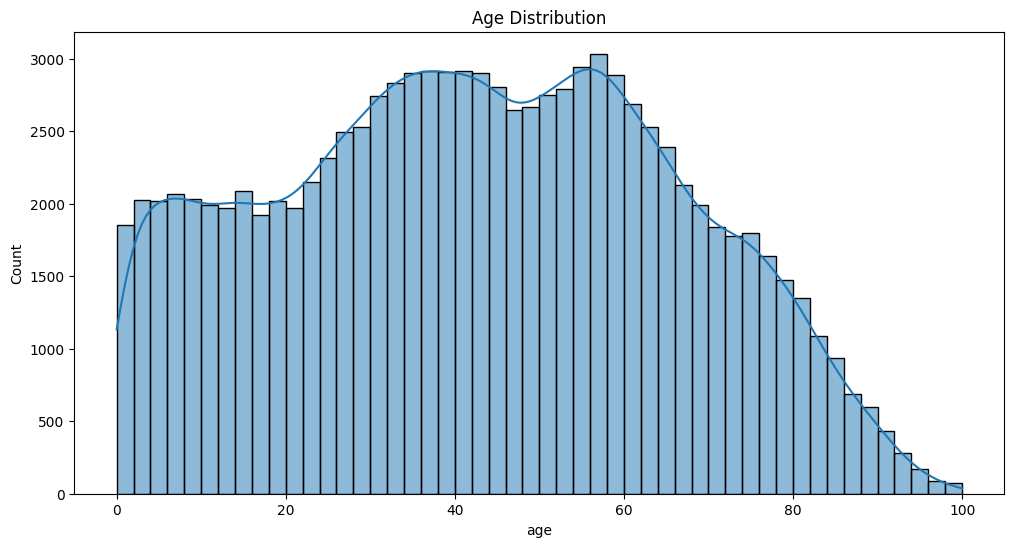

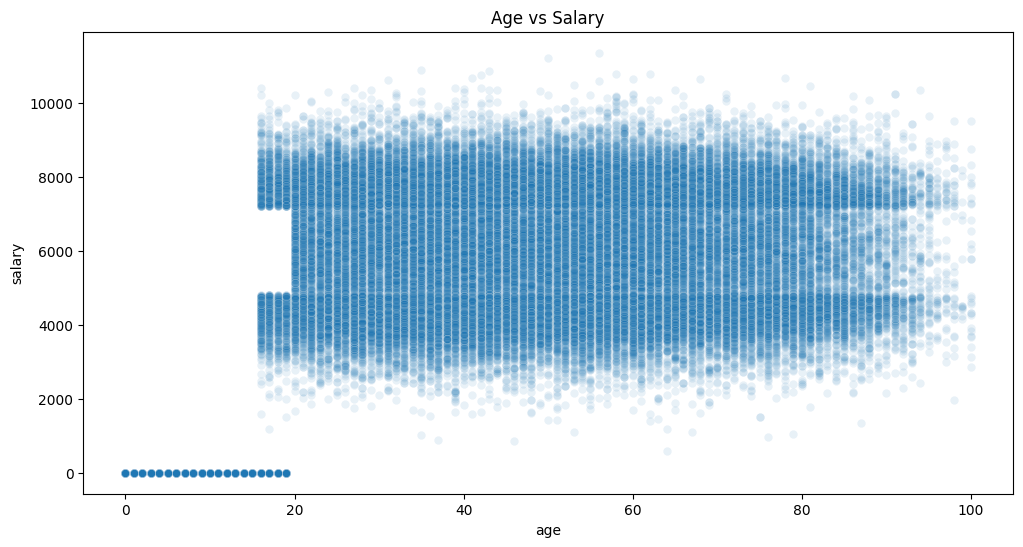

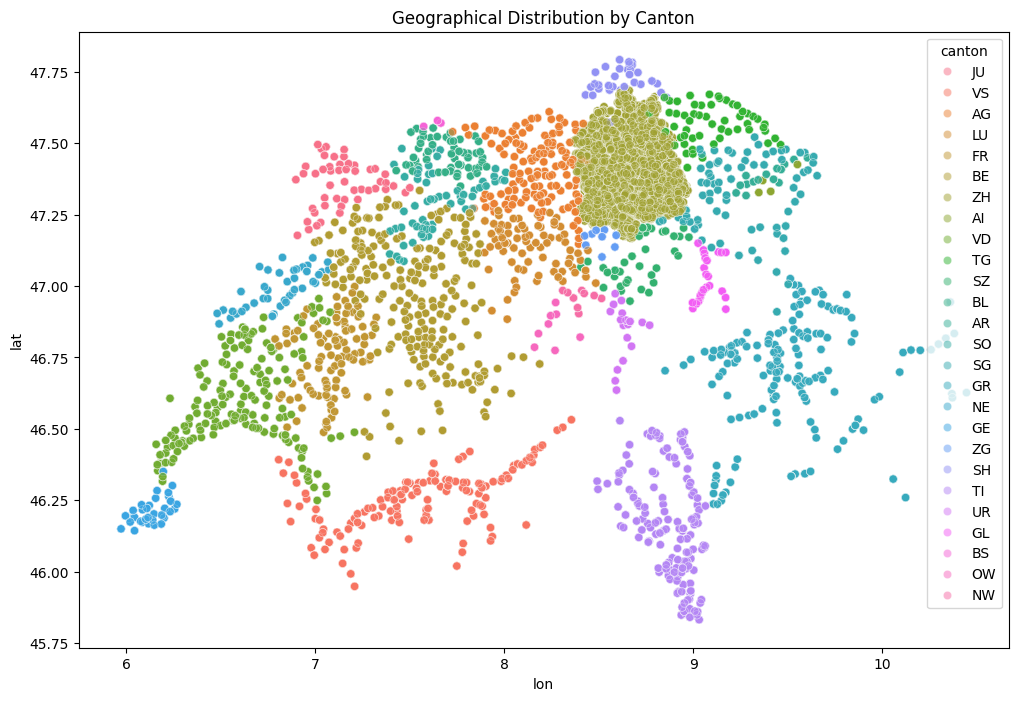

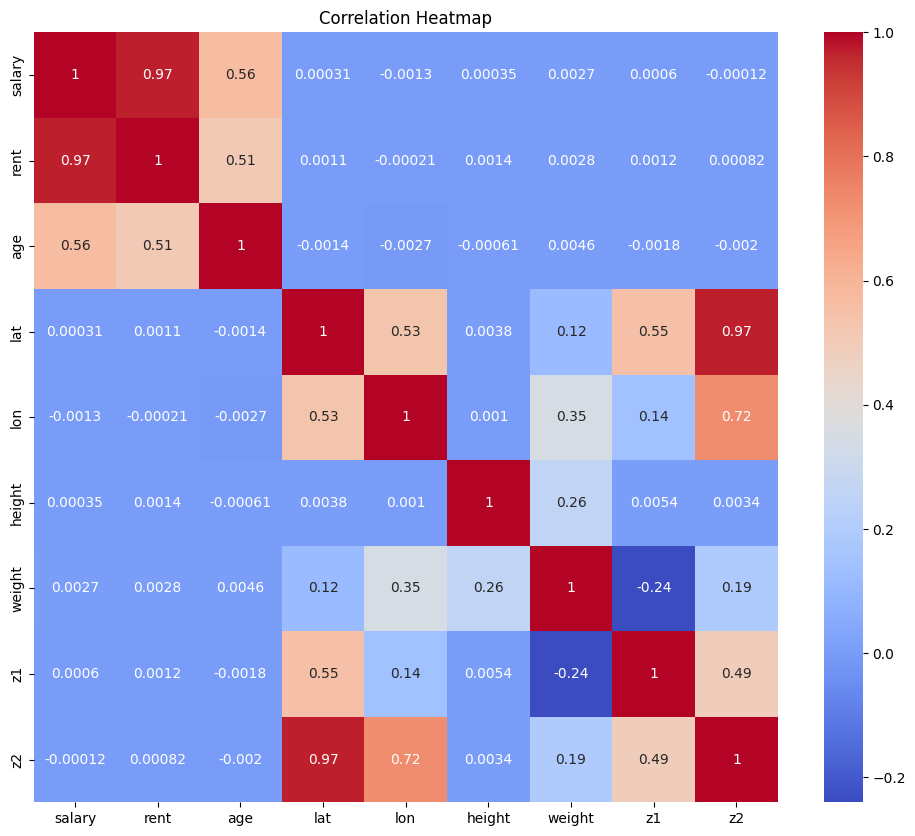

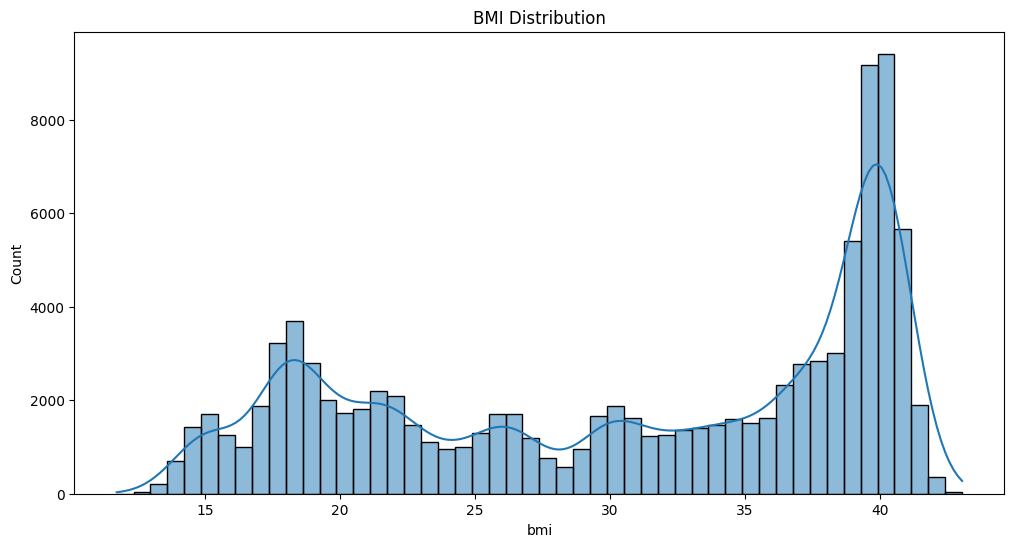

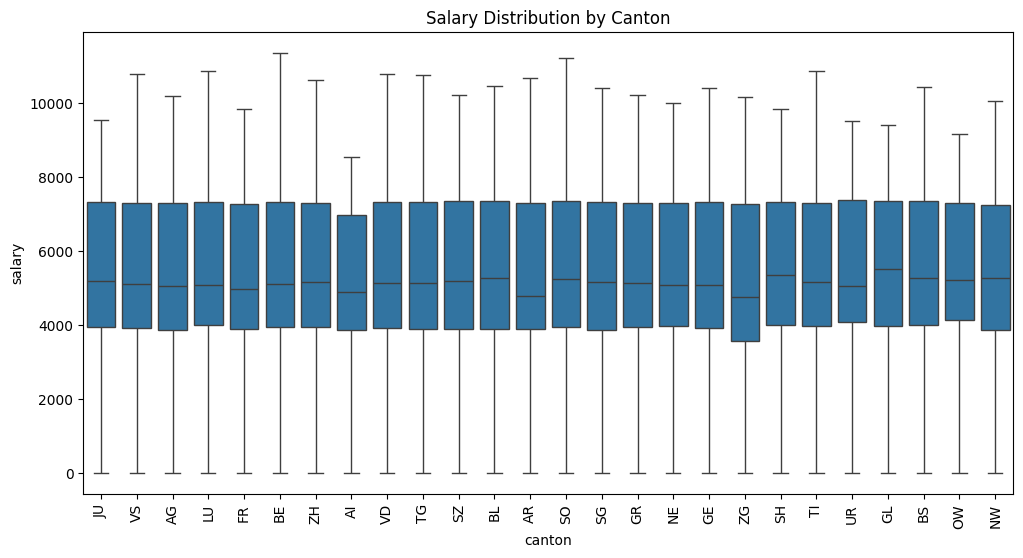

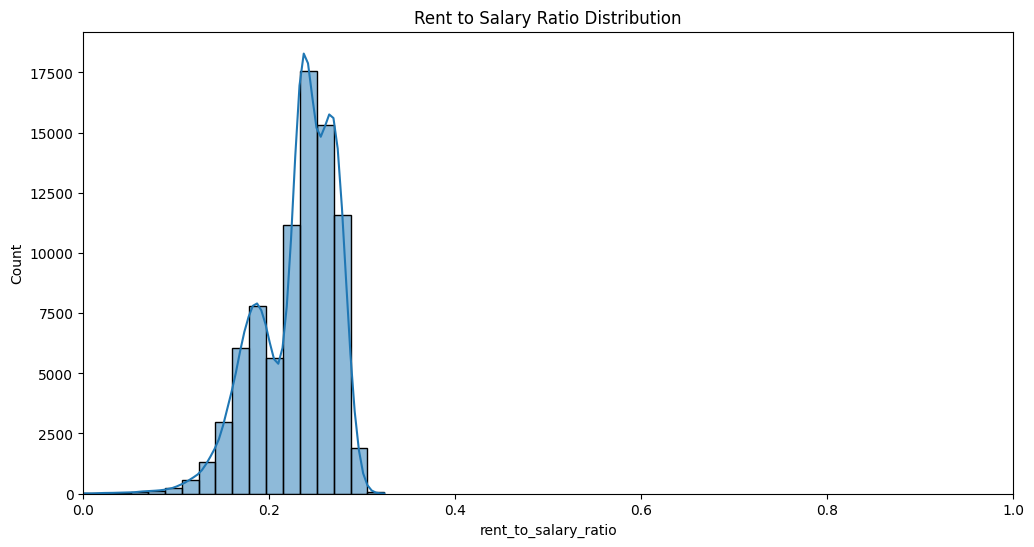

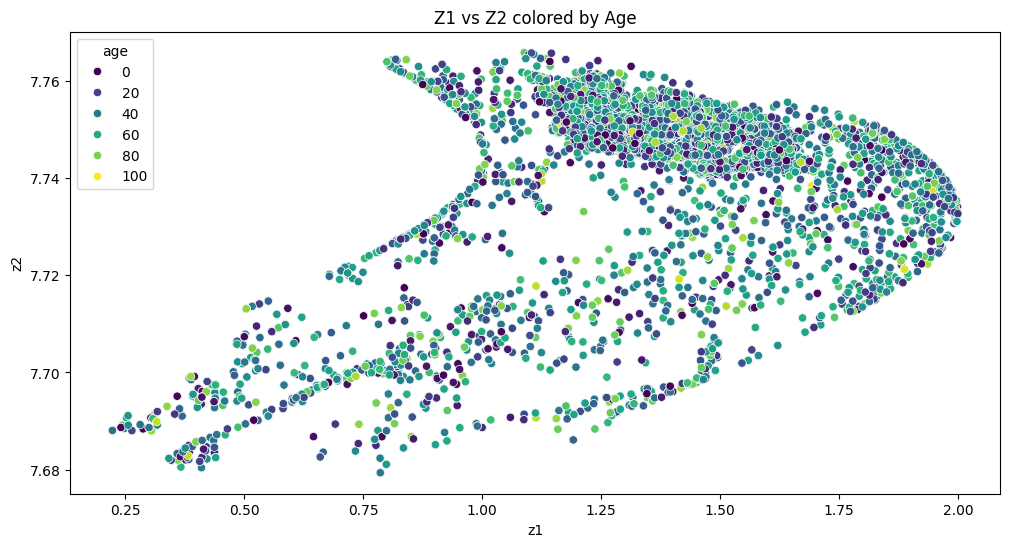

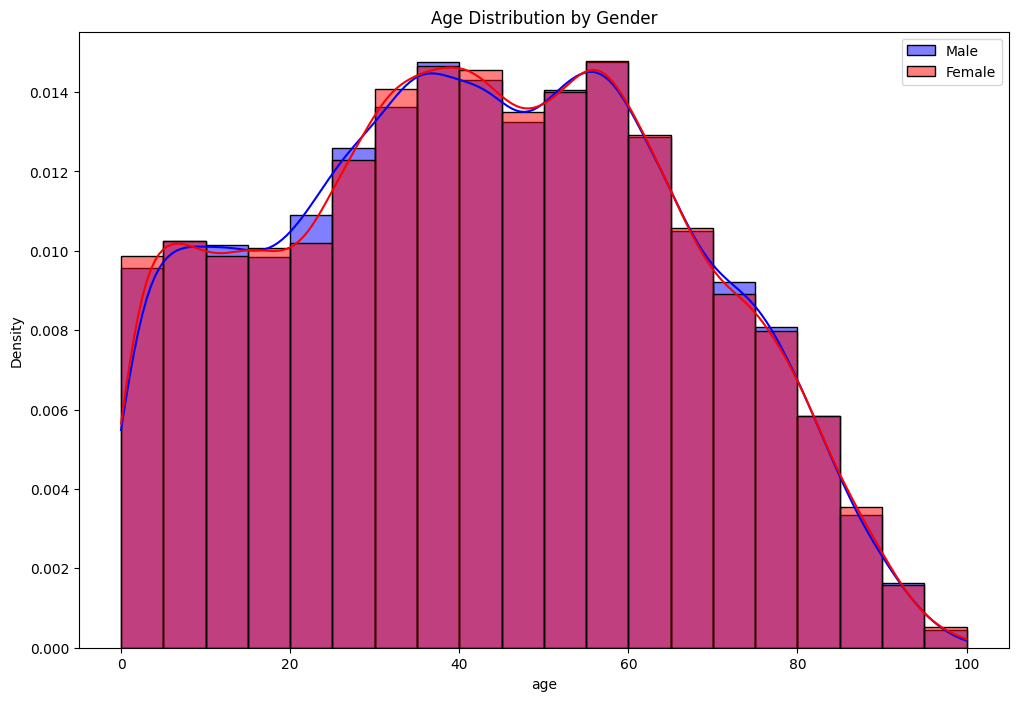

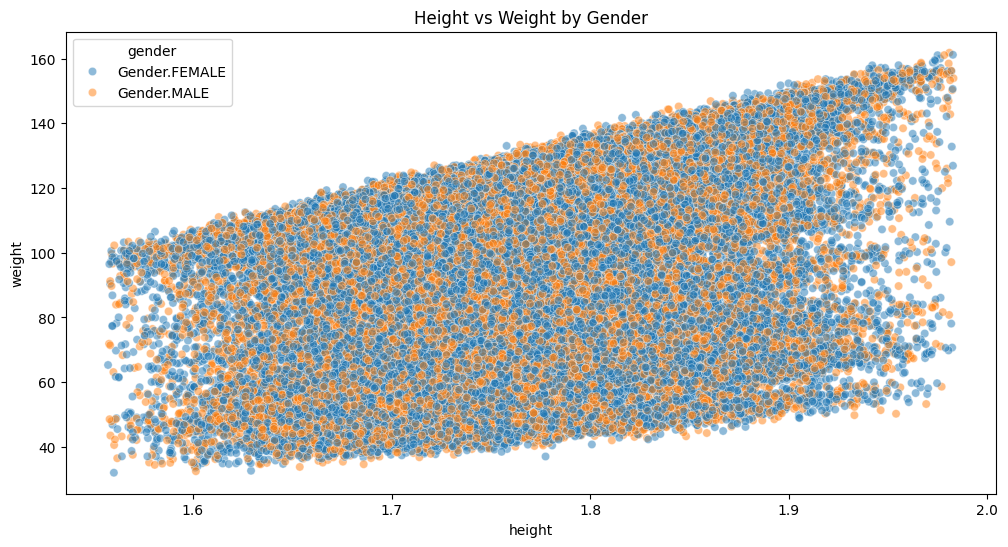

Percentage of people with zero salary: 17.61%
Percentage of people with zero rent: 17.61%
Percentage of people with negative rent: 0.04%
Age range: 0 to 100 years
Number of unique cantons: 26
Most common canton: ZH
Canton with highest average salary: GL (CHF 5091.04)
Correlation between z1 and salary: 0.0006
Correlation between z2 and salary: -0.0001
Correlation between z1 and age: -0.0018
Correlation between z2 and age: -0.0020
Correlation between z1 and height: 0.0054
Correlation between z2 and height: 0.0034
Correlation between z1 and weight: -0.2400
Correlation between z2 and weight: 0.1950


In [7]:
# Add the following code after the existing cells

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Ensure we're using the full dataset
data = pd.read_csv("../data/sample_level_2_100k.csv", delimiter=";")

# 1. Gender distribution and its relation to other variables
plt.figure(figsize=(12, 6))
sns.countplot(x="gender", data=data)
plt.title("Gender Distribution")
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(16, 16))
sns.boxplot(x="gender", y="salary", data=data, ax=axes[0, 0])
sns.boxplot(x="gender", y="age", data=data, ax=axes[0, 1])
sns.boxplot(x="gender", y="height", data=data, ax=axes[1, 0])
sns.boxplot(x="gender", y="weight", data=data, ax=axes[1, 1])
plt.tight_layout()
plt.show()

# 2. Age distribution and its relation to salary
plt.figure(figsize=(12, 6))
sns.histplot(data["age"], bins=50, kde=True)
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x="age", y="salary", data=data, alpha=0.1)
plt.title("Age vs Salary")
plt.show()

# 3. Geographical analysis
plt.figure(figsize=(12, 8))
sns.scatterplot(x="lon", y="lat", hue="canton", data=data, alpha=0.5)
plt.title("Geographical Distribution by Canton")
plt.show()

# 4. Correlation heatmap
numeric_cols = ["salary", "rent", "age", "lat", "lon", "height", "weight", "z1", "z2"]
plt.figure(figsize=(12, 10))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 5. BMI calculation and analysis
data["bmi"] = data["weight"] / (data["height"] ** 2)

plt.figure(figsize=(12, 6))
sns.histplot(data["bmi"], bins=50, kde=True)
plt.title("BMI Distribution")
plt.show()

# 6. Salary distribution and outlier analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x="canton", y="salary", data=data)
plt.xticks(rotation=90)
plt.title("Salary Distribution by Canton")
plt.show()

# 7. Rent to salary ratio
data["rent_to_salary_ratio"] = data["rent"] / data["salary"]
data["rent_to_salary_ratio"] = data["rent_to_salary_ratio"].replace(
    [np.inf, -np.inf], np.nan
)

plt.figure(figsize=(12, 6))
sns.histplot(data["rent_to_salary_ratio"].dropna(), bins=50, kde=True)
plt.title("Rent to Salary Ratio Distribution")
plt.xlim(0, 1)  # Assuming most ratios are between 0 and 1
plt.show()

# 8. Z1 and Z2 analysis
plt.figure(figsize=(12, 6))
sns.scatterplot(x="z1", y="z2", hue="age", data=data, palette="viridis")
plt.title("Z1 vs Z2 colored by Age")
plt.show()

# 9. Age pyramid
male_age = data[data["gender"] == "Gender.MALE"]["age"]
female_age = data[data["gender"] == "Gender.FEMALE"]["age"]

plt.figure(figsize=(12, 8))
sns.histplot(
    male_age, bins=20, color="blue", label="Male", kde=True, stat="density", alpha=0.5
)
sns.histplot(
    female_age,
    bins=20,
    color="red",
    label="Female",
    kde=True,
    stat="density",
    alpha=0.5,
)
plt.title("Age Distribution by Gender")
plt.legend()
plt.show()

# 10. Unusual patterns or anomalies
plt.figure(figsize=(12, 6))
sns.scatterplot(x="height", y="weight", hue="gender", data=data, alpha=0.5)
plt.title("Height vs Weight by Gender")
plt.show()

# Print some interesting statistics
print(
    f"Percentage of people with zero salary: {(data['salary'] == 0).mean() * 100:.2f}%"
)
print(f"Percentage of people with zero rent: {(data['rent'] == 0).mean() * 100:.2f}%")
print(
    f"Percentage of people with negative rent: {(data['rent'] < 0).mean() * 100:.2f}%"
)
print(f"Age range: {data['age'].min()} to {data['age'].max()} years")
print(f"Number of unique cantons: {data['canton'].nunique()}")

# Calculate and print the most common canton
most_common_canton = data["canton"].mode().values[0]
print(f"Most common canton: {most_common_canton}")

# Calculate and print the canton with the highest average salary
canton_avg_salary = data.groupby("canton")["salary"].mean()
highest_salary_canton = canton_avg_salary.idxmax()
print(
    f"Canton with highest average salary: {highest_salary_canton} (CHF {canton_avg_salary.max():.2f})"
)

# Analyze the relationship between z1, z2 and other variables
for col in ["salary", "age", "height", "weight"]:
    correlation_z1 = data["z1"].corr(data[col])
    correlation_z2 = data["z2"].corr(data[col])
    print(f"Correlation between z1 and {col}: {correlation_z1:.4f}")
    print(f"Correlation between z2 and {col}: {correlation_z2:.4f}")

### Distributions

/Users/magnus/Developer/ETH/SynthDataGen/env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6626: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/Users/magnus/Developer/ETH/SynthDataGen/env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/magnus/Developer/ETH/SynthDataGen/env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6617: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


{'salary': {'distribution': 'norm', 'params': (4939.172666803565, 2719.430689693099), 'p_value': 0.0}, 'rent': {'distribution': 'norm', 'params': (1165.9432444856388, 714.2798312979843), 'p_value': 0.0}, 'age': {'distribution': 'norm', 'params': (42.44459, 23.306293350335654), 'p_value': 4.9973175558174824e-158}, 'lat': {'distribution': 'norm', 'params': (47.083140708299986, 0.43549373769286437), 'p_value': 0.0}, 'lon': {'distribution': 'norm', 'params': (8.096308299399999, 0.8970876171696931), 'p_value': 0.0}, 'height': {'distribution': 'norm', 'params': (1.770308205803311, 0.06996997189201003), 'p_value': 0.29006577034587777}, 'weight': {'distribution': 'norm', 'params': (96.33487461103212, 29.481392995934527), 'p_value': 0.0}, 'z1': {'distribution': 'beta', 'params': (1.9921604782945548, 1.1197420844567008, 0.17668996955153593, 1.8232831960316336), 'p_value': 2.9082016057264402e-173}, 'z2': {'distribution': 'norm', 'params': (7.733167920412882, 0.021906553554476405), 'p_value': 0.0}

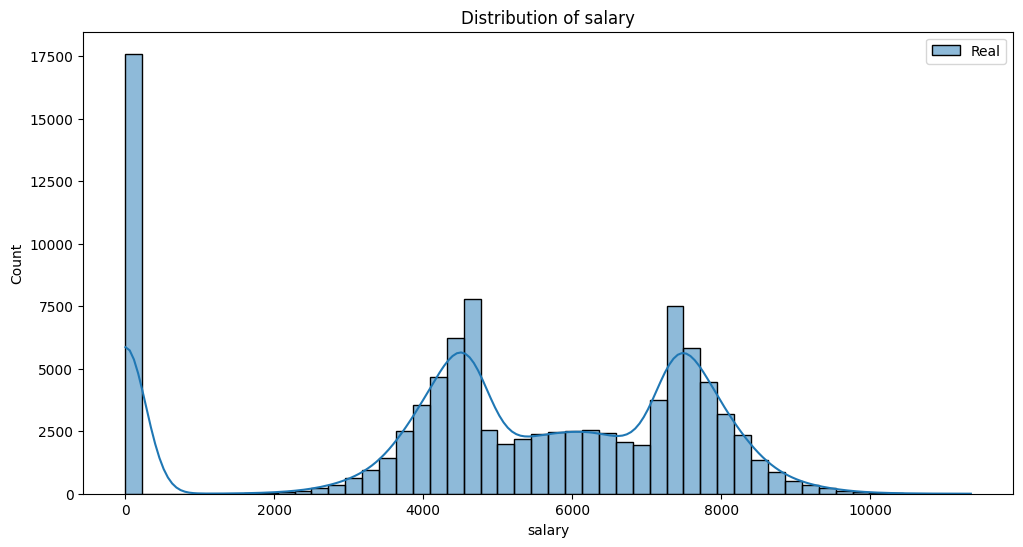

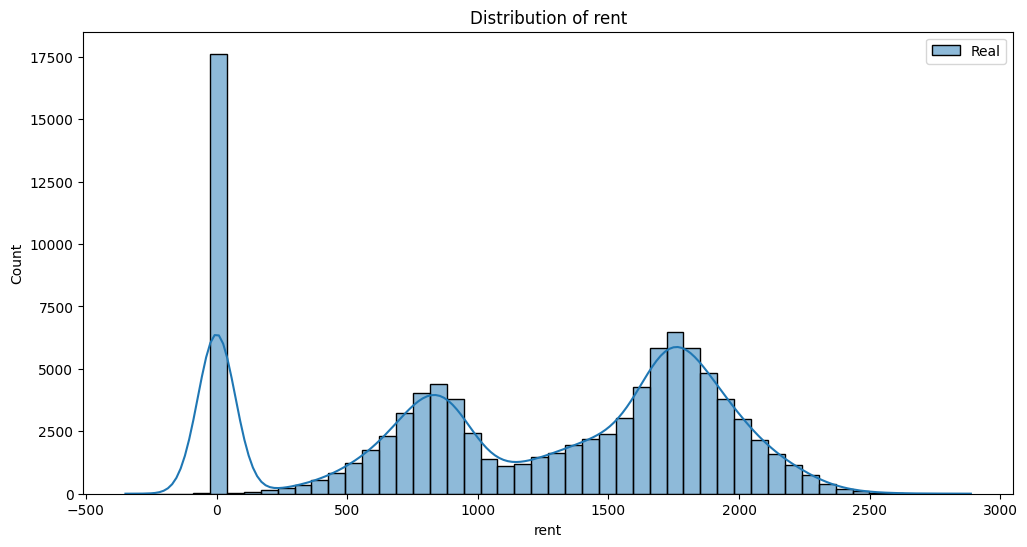

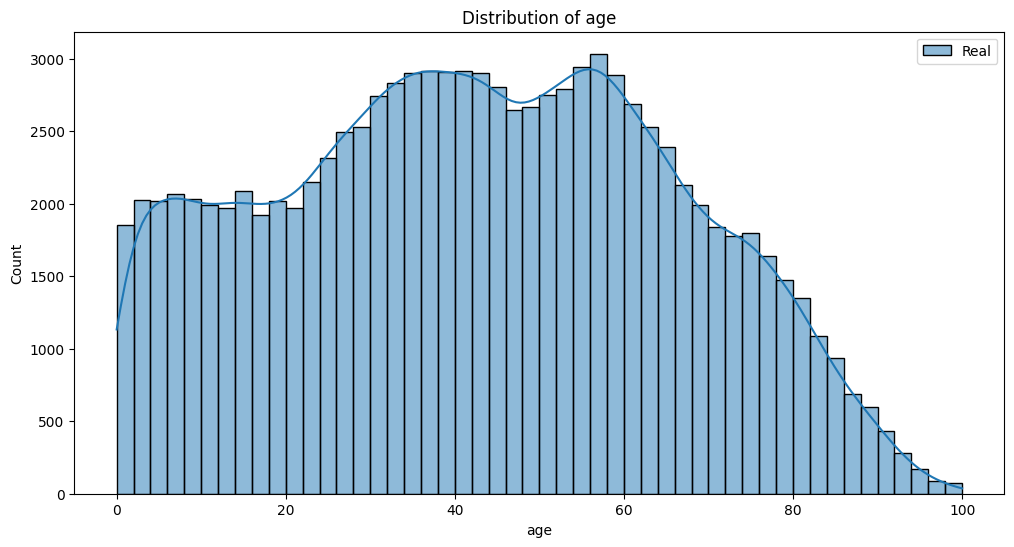

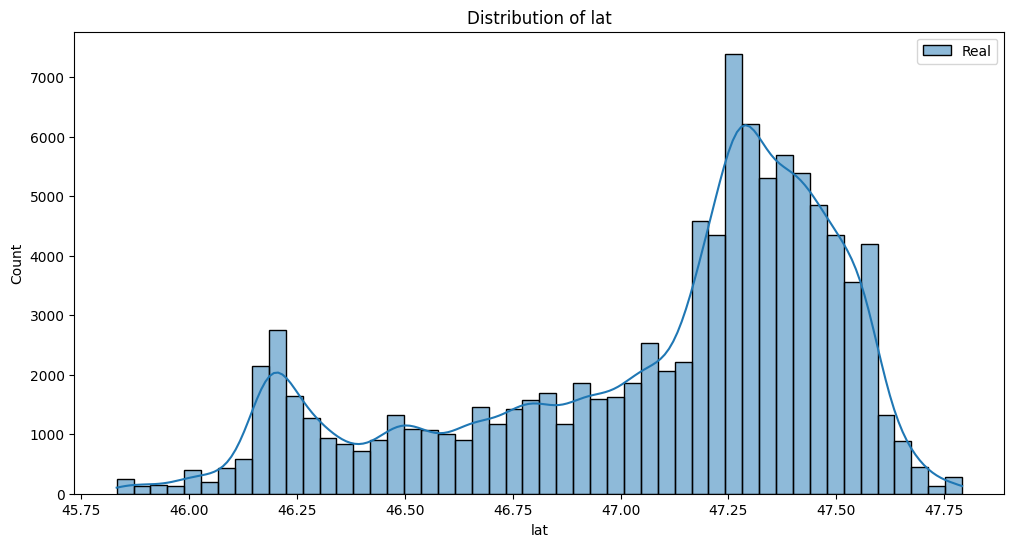

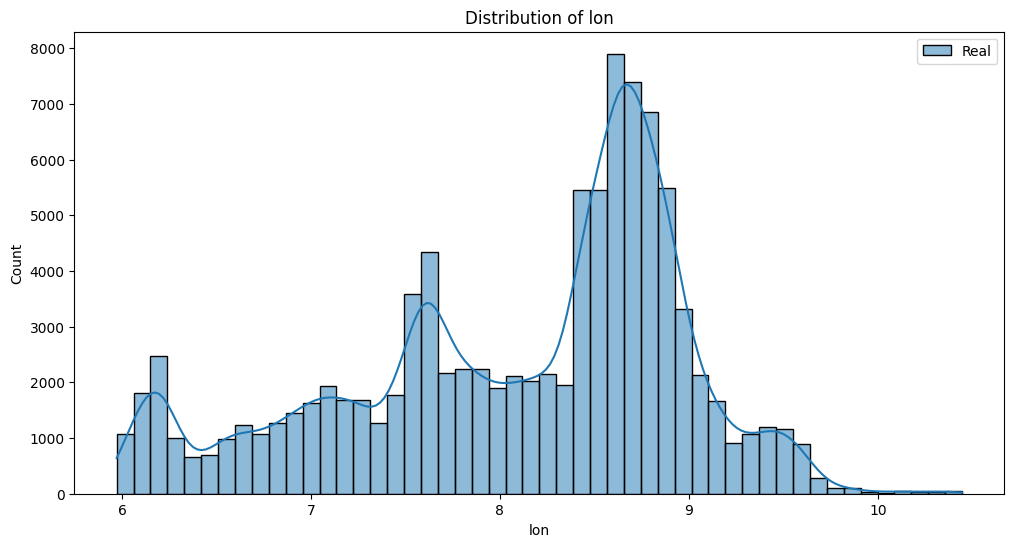

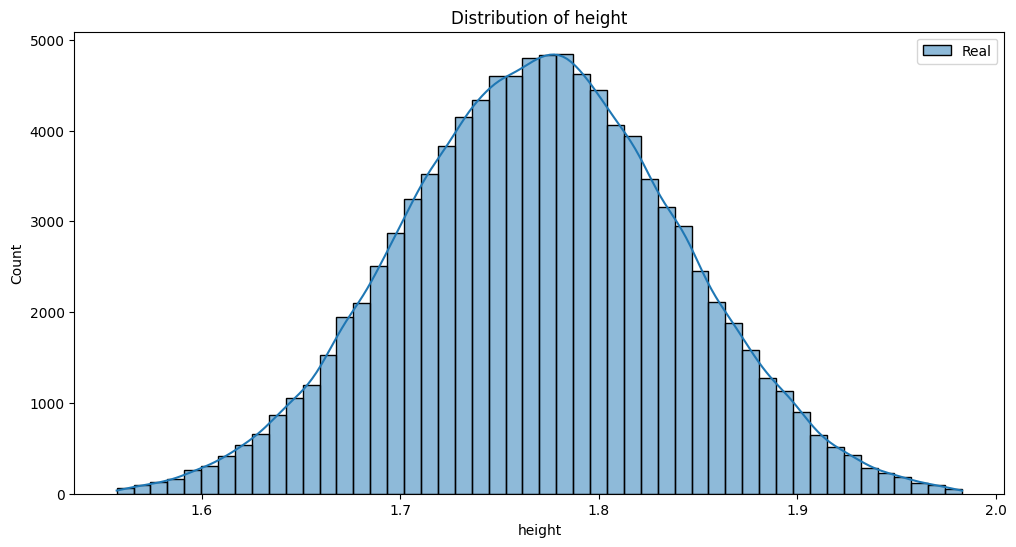

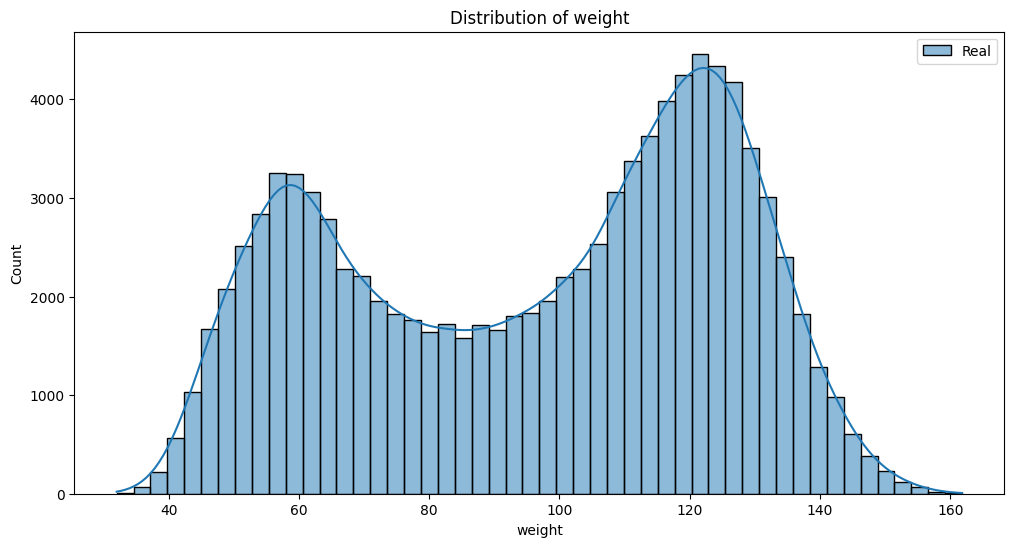

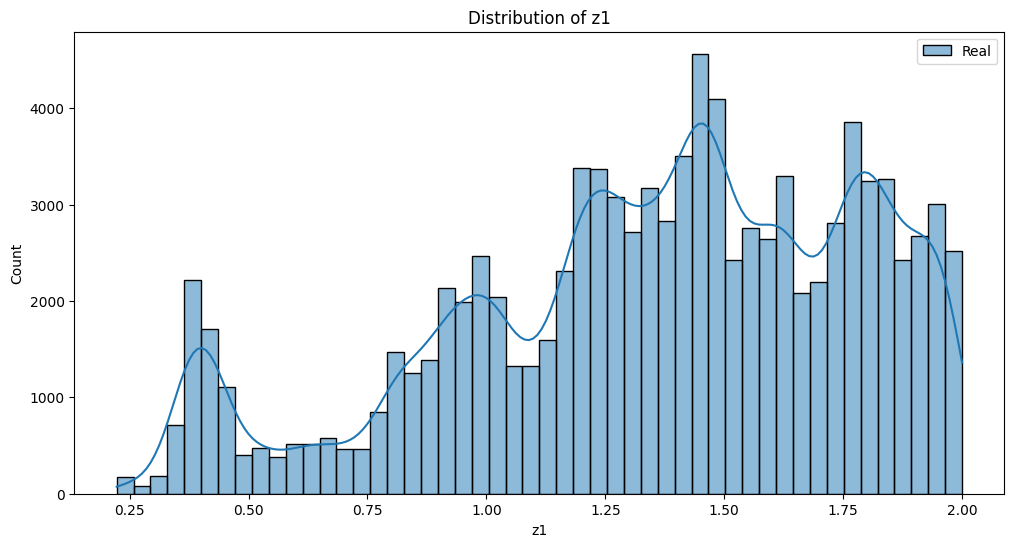

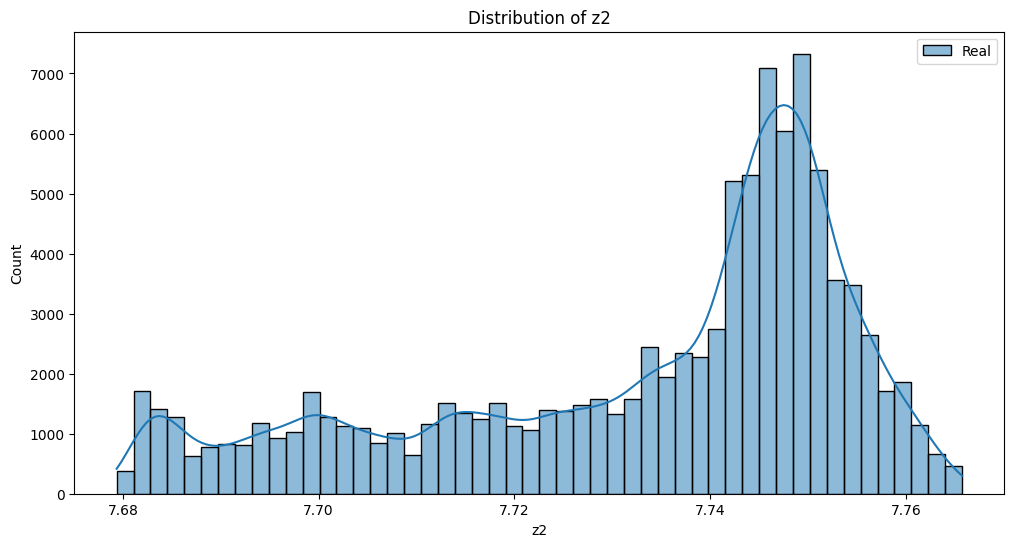

{'salary': {'name': 'norm', 'type': 'norm'}, 'rent': {'name': 'norm', 'type': 'norm'}, 'age': {'name': 'norm', 'type': 'norm'}, 'lat': {'name': 'norm', 'type': 'norm'}, 'lon': {'name': 'norm', 'type': 'norm'}, 'height': {'name': 'norm', 'type': 'norm'}, 'weight': {'name': 'norm', 'type': 'norm'}, 'z1': {'name': 'beta', 'type': 'beta'}, 'z2': {'name': 'norm', 'type': 'norm'}}


In [14]:
# infer numerical_distributions from data, like beta, uniform, poisson, etc. with scipy
from scipy import stats
from scipy.stats import describe
import numpy as np

# calculate for each which distribution fits the best for the numerical columns
best_distributions = {}
distributions = {}
for column in data.select_dtypes(include=["number"]).columns:
    distribution = describe(data[column])
    distributions[column] = distribution

# List of distributions to test
dist_names = ["norm", "beta", "expon", "lognorm", "gamma", "uniform"]

for column in data.select_dtypes(include=["number"]).columns:
    best_distribution = None
    best_params = None
    best_sse = -np.inf

    for dist_name in dist_names:
        dist = getattr(stats, dist_name)
        try:
            # Remove NaN values
            column_data = data[column].dropna()

            # Fit distribution
            params = dist.fit(column_data)

            # Kolmogorov-Smirnov test
            _, p_value = stats.kstest(column_data, dist_name, args=params)

            if p_value > best_sse:
                best_distribution = dist_name
                best_params = params
                best_sse = p_value
        except Exception as e:
            print(f"Error fitting {dist_name} distribution for {column}: {e}")

    best_distributions[column] = {
        "distribution": best_distribution,
        "params": best_params,
        "p_value": best_sse,
    }

print(best_distributions)

# plot the distributions
for column in data.select_dtypes(include=["number"]).columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(data[column], kde=True, bins=50, label="Real")
    plt.title(f"Distribution of {column}")
    plt.legend()
    plt.show()

# get numerical_distributions with name: type
numerical_distributions = {}
for column in data.select_dtypes(include=["number"]).columns:
    numerical_distributions[column] = {
        "name": best_distributions[column]["distribution"],
        "type": best_distributions[column]["distribution"],
    }

print(numerical_distributions)
numerical_distributions = {n: t["type"] for n, t in numerical_distributions.items()}
print(numerical_distributions)


## Fitting

{
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1",
    "columns": {
        "gender": {
            "sdtype": "categorical"
        },
        "salary": {
            "sdtype": "numerical"
        },
        "rent": {
            "sdtype": "numerical"
        },
        "age": {
            "sdtype": "numerical"
        },
        "canton": {
            "sdtype": "categorical"
        },
        "lat": {
            "sdtype": "numerical"
        },
        "lon": {
            "sdtype": "numerical"
        },
        "height": {
            "sdtype": "numerical"
        },
        "weight": {
            "sdtype": "numerical"
        },
        "z1": {
            "sdtype": "numerical"
        },
        "z2": {
            "sdtype": "numerical"
        }
    }
}


/Users/magnus/Developer/ETH/SynthDataGen/env/lib/python3.10/site-packages/sdv/single_table/base.py:120: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/Users/magnus/Developer/ETH/SynthDataGen/env/lib/python3.10/site-packages/sdv/single_table/base.py:105: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 11/11 [00:00<00:00, 21.88it/s]|
Column Shapes Score: 91.36%

(2/2) Evaluating Column Pair Trends: |██████████| 55/55 [00:00<00:00, 87.66it/s]|
Column Pair Trends Score: 88.82%

Overall Score (Average): 90.09%


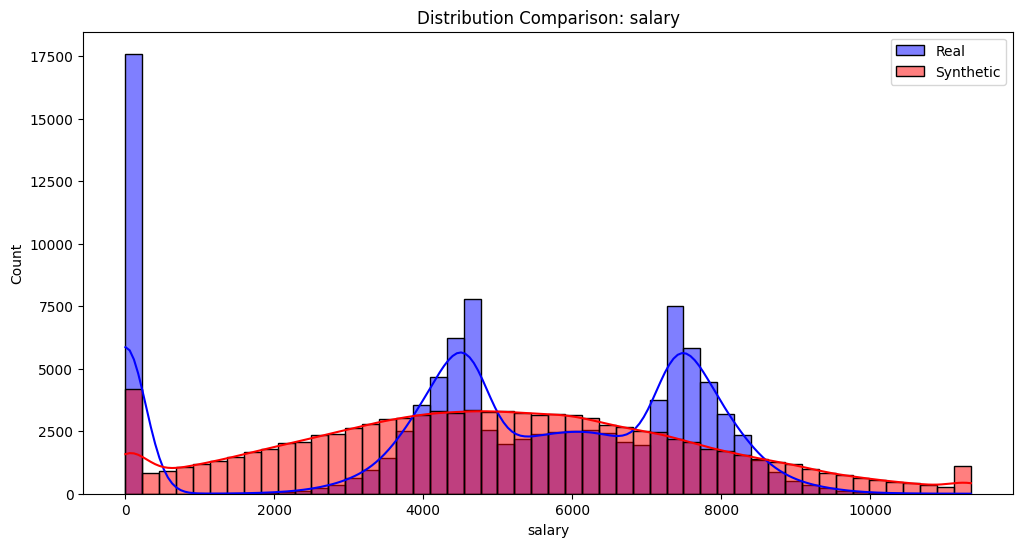

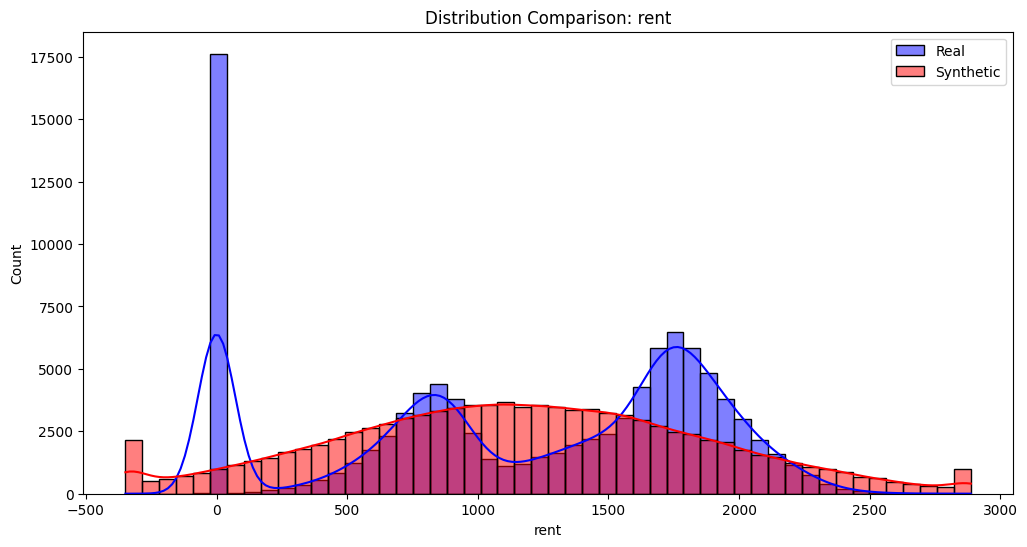

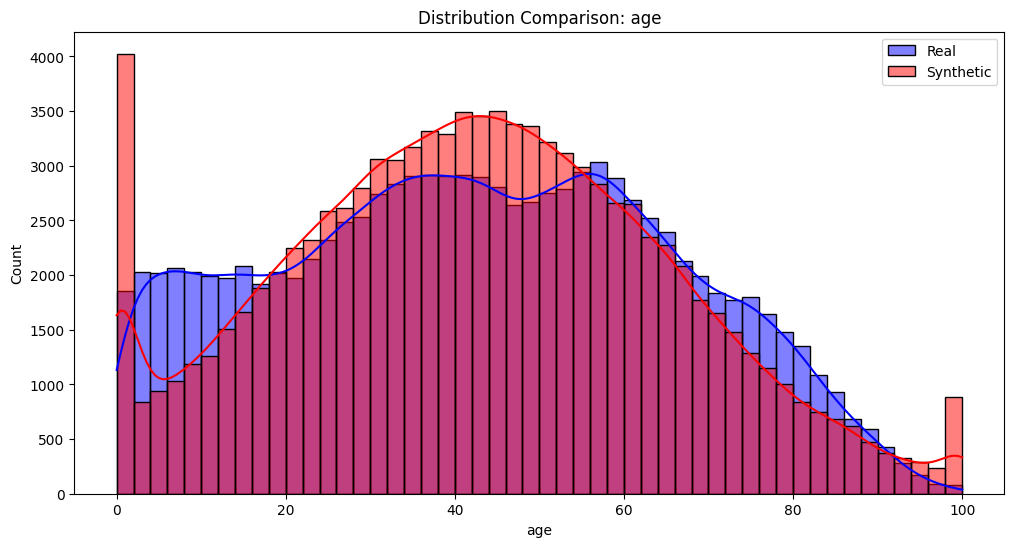

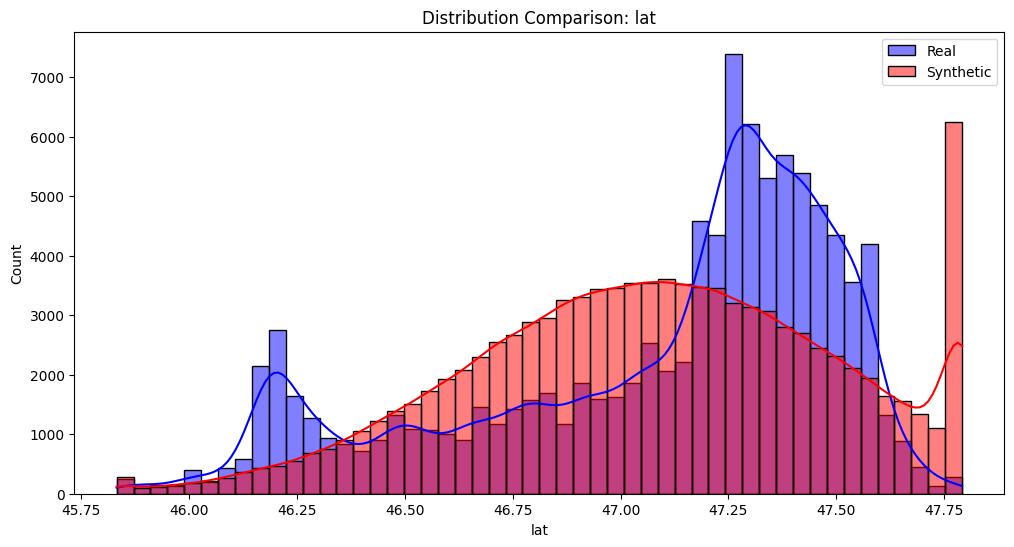

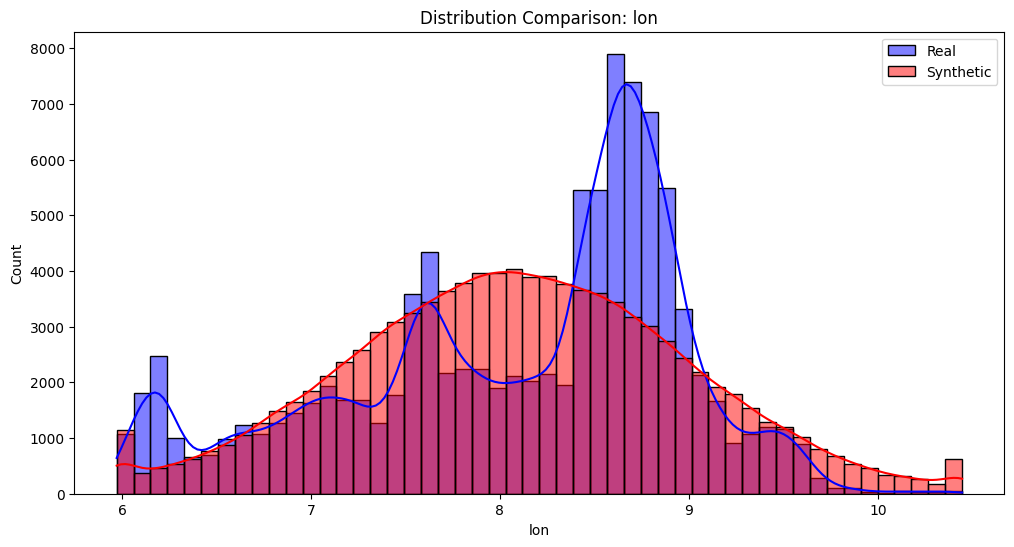

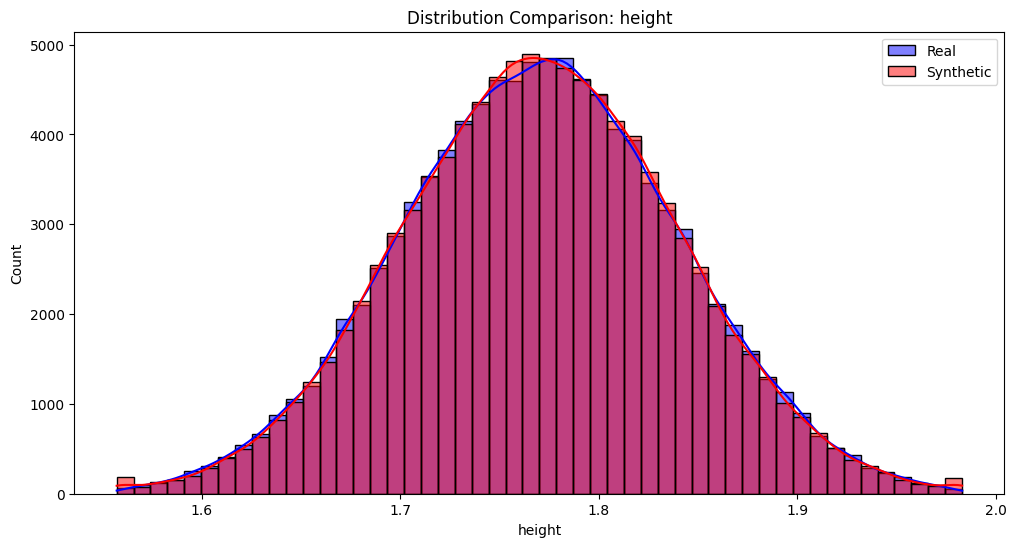

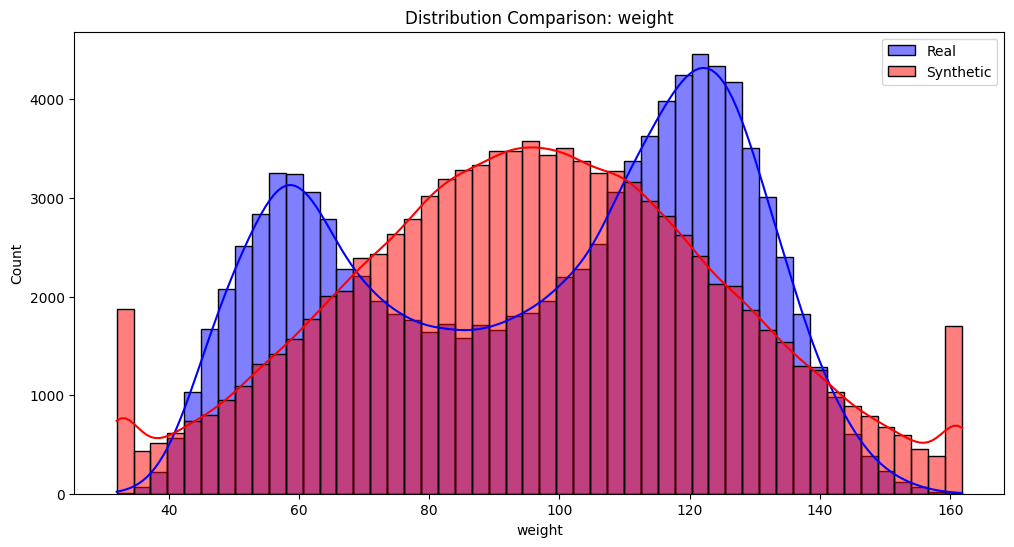

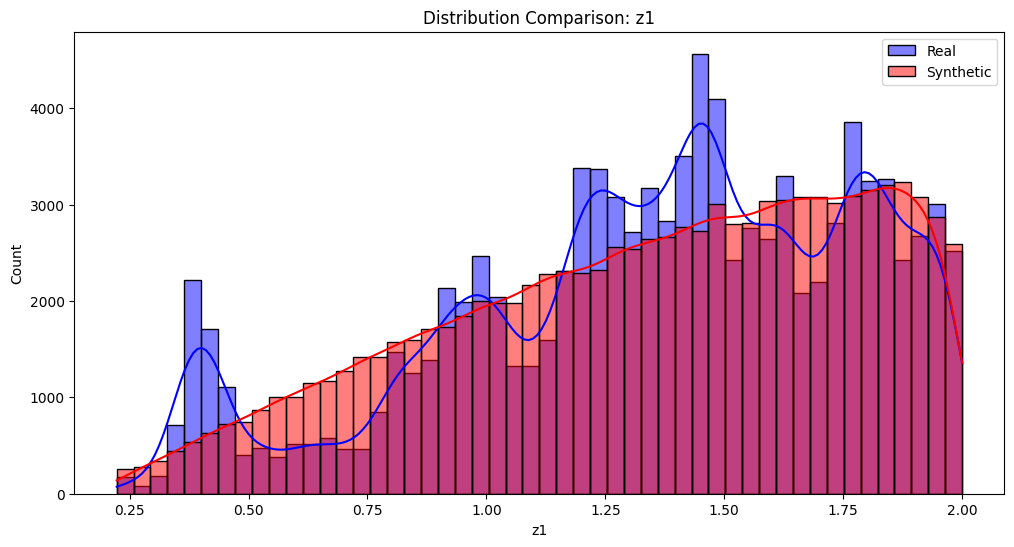

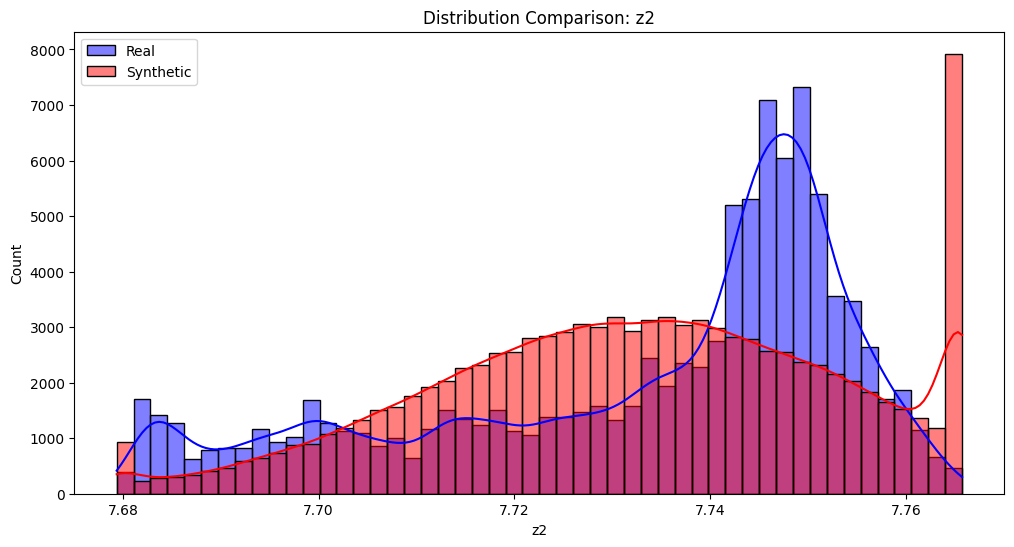

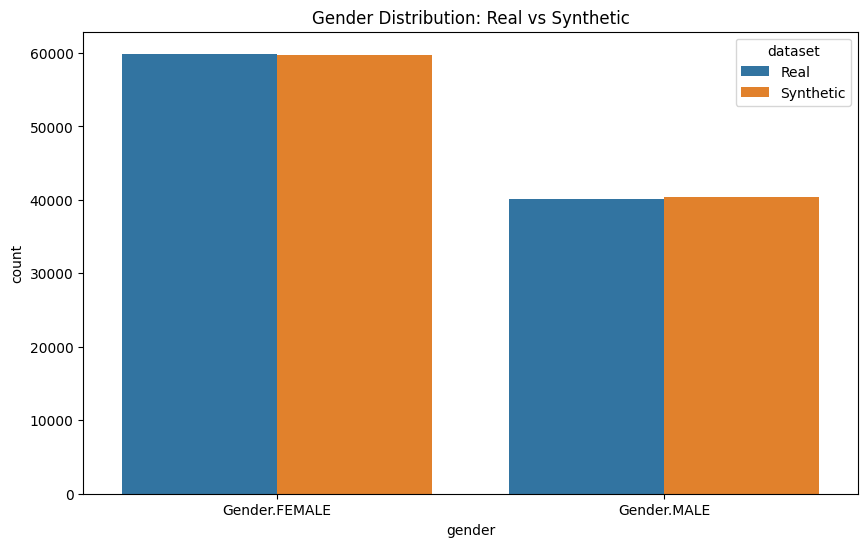

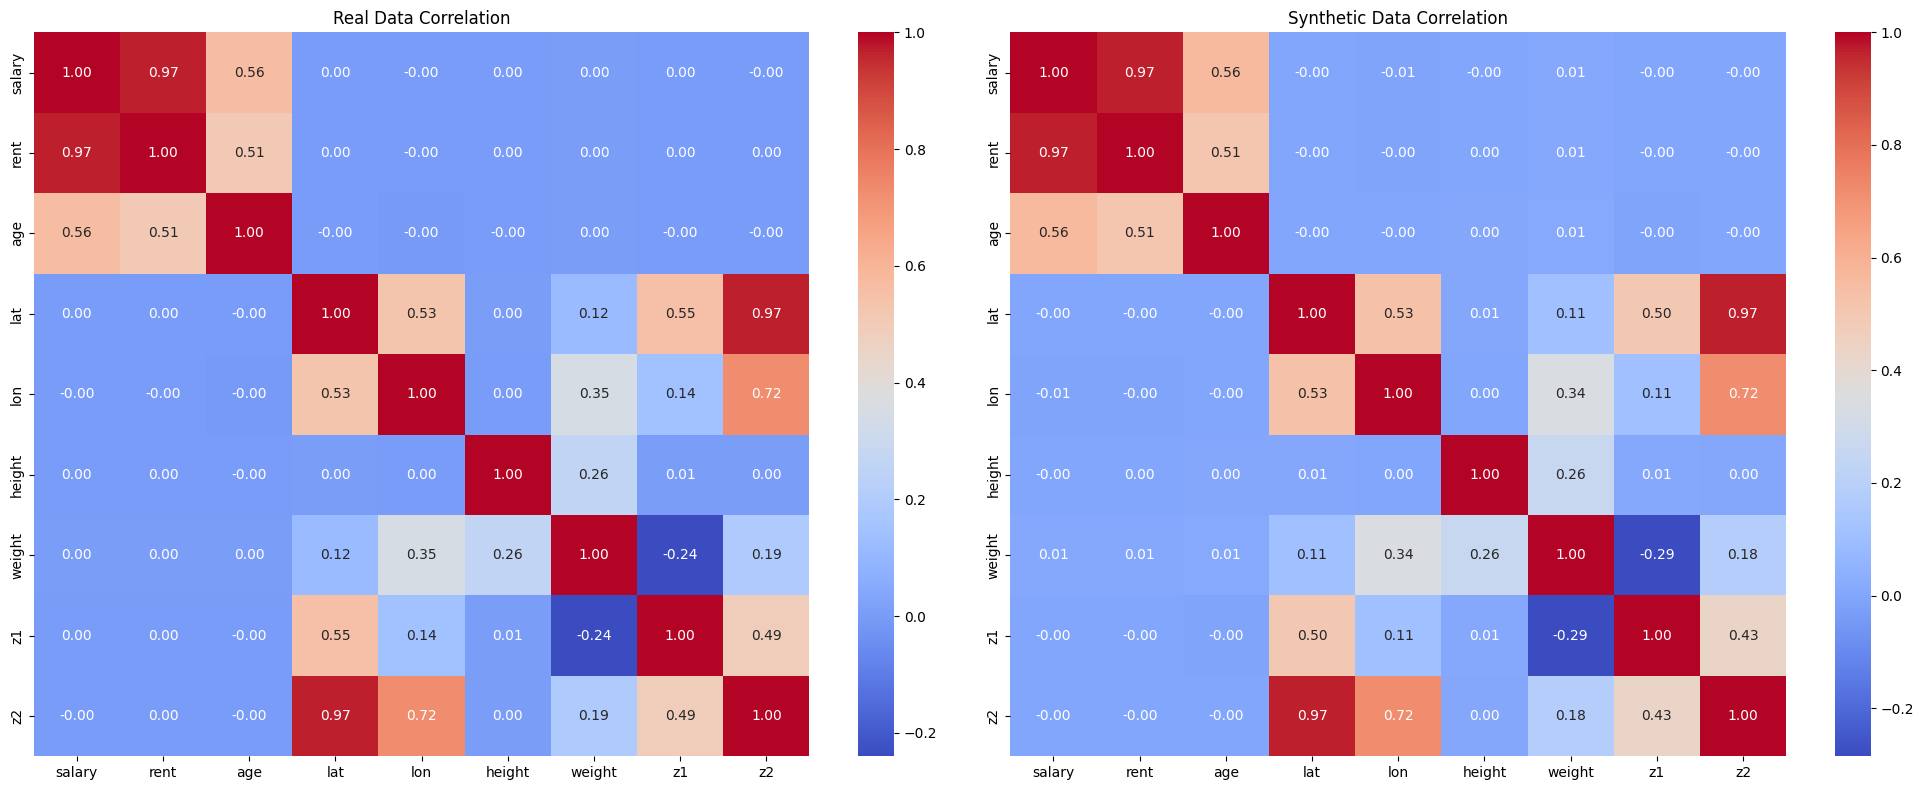

K-anonymity for real data: 1
K-anonymity for synthetic data: 1

Overall Evaluation Results:


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sdv.single_table import GaussianCopulaSynthesizer
# fix import
# GaussianCopula

from sdv.metadata import SingleTableMetadata
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.evaluation.single_table import evaluate_quality
# from sdv.metrics.tabular import KSTest

# Load the data
data = pd.read_csv("../data/sample_level_2_100k.csv", delimiter=";")

# Create metadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data)
print(metadata)


# Create and fit the GaussianCopula model
model = GaussianCopulaSynthesizer(
    metadata=metadata, numerical_distributions=numerical_distributions
)
model.fit(data)

# Generate synthetic data
synthetic_data = model.sample(num_rows=len(data))

# Evaluation
evaluation_results = evaluate_quality(data, synthetic_data, metadata=metadata)


# Plotting function for distribution comparison
def plot_distribution_comparison(real_data, synth_data, column, bins=50):
    plt.figure(figsize=(12, 6))
    sns.histplot(
        real_data[column], kde=True, color="blue", alpha=0.5, bins=bins, label="Real"
    )
    sns.histplot(
        synth_data[column],
        kde=True,
        color="red",
        alpha=0.5,
        bins=bins,
        label="Synthetic",
    )
    plt.title(f"Distribution Comparison: {column}")
    plt.legend()
    plt.show()


# Plot distributions for numerical columns
numerical_columns = [
    "salary",
    "rent",
    "age",
    "lat",
    "lon",
    "height",
    "weight",
    "z1",
    "z2",
]
for col in numerical_columns:
    plot_distribution_comparison(data, synthetic_data, col)

# Plot categorical data
plt.figure(figsize=(10, 6))
sns.countplot(
    x="gender",
    hue="dataset",
    data=pd.concat(
        [data.assign(dataset="Real"), synthetic_data.assign(dataset="Synthetic")]
    ),
)
plt.title("Gender Distribution: Real vs Synthetic")
plt.show()

# Correlation heatmap comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(
    data[numerical_columns].corr(), ax=ax1, cmap="coolwarm", annot=True, fmt=".2f"
)
ax1.set_title("Real Data Correlation")
sns.heatmap(
    synthetic_data[numerical_columns].corr(),
    ax=ax2,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
)
ax2.set_title("Synthetic Data Correlation")
plt.tight_layout()
plt.show()


# Privacy evaluation using K-anonymity (simplified version)
def k_anonymity(df, sensitive_columns):
    return df.groupby(sensitive_columns).size().min()


sensitive_columns = ["age", "gender", "canton"]
k_real = k_anonymity(data, sensitive_columns)
k_synthetic = k_anonymity(synthetic_data, sensitive_columns)

print(f"K-anonymity for real data: {k_real}")
print(f"K-anonymity for synthetic data: {k_synthetic}")


# Overall evaluation results
print("\nOverall Evaluation Results:")
print(evaluation_results)

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sdv.metadata import SingleTableMetadata
from sdv.single_table import (
    GaussianCopulaSynthesizer,
    CTGANSynthesizer,
    TVAESynthesizer,
    CopulaGANSynthesizer,
)
from sdv.evaluation.single_table import evaluate_quality
import time
import os


def load_and_prepare_data(file_path):
    """Load data and create metadata."""
    data = pd.read_csv(file_path, delimiter=";")
    metadata = SingleTableMetadata()
    metadata.detect_from_dataframe(data)
    return data, metadata


def train_synthesizer(synthesizer_class, data, metadata):
    """Train a synthesizer and generate synthetic data."""
    synthesizer = synthesizer_class(metadata)
    synthesizer.fit(data)
    synthetic_data = synthesizer.sample(num_rows=len(data))
    return synthetic_data


def evaluate_synthesizer(real_data, synthetic_data, metadata):
    """Evaluate the quality of synthetic data."""
    return evaluate_quality(real_data, synthetic_data, metadata=metadata)


def save_distribution_comparison(real_data, synthetic_data, column, title, folder):
    """Save distribution comparison for a specific column."""
    plt.figure(figsize=(12, 6))
    sns.histplot(real_data[column], kde=True, color="blue", alpha=0.5, label="Real")
    sns.histplot(
        synthetic_data[column], kde=True, color="red", alpha=0.5, label="Synthetic"
    )
    plt.title(f"{title} - Distribution Comparison: {column}")
    plt.legend()
    plt.savefig(os.path.join(folder, f"{column}_distribution.png"))
    plt.close()


def save_correlation_heatmap(data, title, folder):
    """Save correlation heatmap for numeric columns only."""
    numeric_data = data.select_dtypes(include=[np.number])
    plt.figure(figsize=(12, 10))
    sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
    plt.title(f"{title} - Correlation Heatmap (Numeric Columns)")
    plt.savefig(os.path.join(folder, "correlation_heatmap.png"))
    plt.close()


def plot_selected_comparisons(real_data, synthetic_data_dict, columns_to_plot):
    """Plot selected comparisons for multiple synthesizers."""
    n_cols = len(columns_to_plot)
    n_rows = len(synthetic_data_dict) + 1  # +1 for real data
    fig, axes = plt.subplots(
        n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows), squeeze=False
    )

    for col, column in enumerate(columns_to_plot):
        sns.histplot(real_data[column], kde=True, color="blue", ax=axes[0, col])
        axes[0, col].set_title(f"Real Data - {column}")

        for row, (name, synth_data) in enumerate(synthetic_data_dict.items(), start=1):
            sns.histplot(synth_data[column], kde=True, color="red", ax=axes[row, col])
            axes[row, col].set_title(f"{name} - {column}")

    plt.tight_layout()
    plt.savefig("selected_comparisons.png")
    plt.close()


def compare_synthesizers(file_path, synthesizers):
    """Compare different synthesizers."""
    real_data, metadata = load_and_prepare_data(file_path)

    results = {}
    for name, synthesizer_class in synthesizers.items():
        print(f"Training {name}...")
        start_time = time.time()
        folder = f"plots_{name}"
        os.makedirs(folder, exist_ok=True)

        # Create an instance of the synthesizer
        try:
            print(f"Initializing {name}...")
            synthesizer = synthesizer_class(
                metadata, verbose=True, epochs=100, batch_size=1000
            )
        except Exception as e:
            print(f"Error occurred while initializing {name}: {str(e)}")
            synthesizer = synthesizer_class(metadata)

        synthesizer.fit(real_data)

        print(f"Generating synthetic data with {name}...")
        synthetic_data = synthesizer.sample(num_rows=len(real_data))

        print(f"Evaluating {name}...")
        evaluation = evaluate_synthesizer(real_data, synthetic_data, metadata)
        results[name] = {"synthetic_data": synthetic_data, "evaluation": evaluation}

        print(f"Saving plots for {name}...")
        for column in real_data.select_dtypes(include=[np.number]).columns:
            save_distribution_comparison(
                real_data, synthetic_data, column, name, folder
            )
        save_correlation_heatmap(synthetic_data, name, folder)

        print(f"{name} Evaluation Results:")
        print(evaluation)

        print("\n" + "=" * 50 + "\n")
        end_time = time.time()
        print(f"Time taken for {name}: {(end_time - start_time) / 60:.2f} minutes")

    if results:
        print("Plotting selected comparisons...")
        columns_to_plot = real_data.select_dtypes(include=[np.number]).columns[
            :3
        ]  # Select first 3 numeric columns
        plot_selected_comparisons(
            real_data,
            {name: result["synthetic_data"] for name, result in results.items()},
            columns_to_plot,
        )
    else:
        print("No results to plot. All synthesizers failed.")

    return results

In [57]:
# Main execution
from sdv.single_table import (
    CopulaGANSynthesizer,
    GaussianCopulaSynthesizer,
    CTGANSynthesizer,
    TVAESynthesizer,
)

synthesizers = {
    "CTGAN": CTGANSynthesizer,
    "CopulaGAN": CopulaGANSynthesizer,
    "TVAE": TVAESynthesizer,
    "GaussianCopula": GaussianCopulaSynthesizer,
}

file_path = "../data/sample_level_2_100k.csv"
results = compare_synthesizers(file_path, synthesizers)

# Additional analysis or visualization
print("\nQuality Score Comparison:")
evaluation_comparison = {
    name: result["evaluation"]["quality_score"] for name, result in results.items()
}
for name, score in evaluation_comparison.items():
    print(f"{name}: {score:.4f}")

plt.figure(figsize=(10, 6))
plt.bar(evaluation_comparison.keys(), evaluation_comparison.values())
plt.title("Quality Score Comparison")
plt.ylabel("Quality Score")
plt.savefig("quality_score_comparison.png")
plt.close()
print("Quality score comparison plot saved as 'quality_score_comparison.png'")

Training CTGAN...
Initializing CTGAN...


/Users/magnus/Developer/ETH/SynthDataGen/env/lib/python3.10/site-packages/sdv/single_table/base.py:120: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/Users/magnus/Developer/ETH/SynthDataGen/env/lib/python3.10/site-packages/sdv/single_table/base.py:105: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
Gen. (-0.09) | Discrim. (-0.08): 100%|██████████| 100/100 [04:50<00:00,  2.91s/it]


Generating synthetic data with CTGAN...
Evaluating CTGAN...
Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 11/11 [00:00<00:00, 18.12it/s]|
Column Shapes Score: 91.65%

(2/2) Evaluating Column Pair Trends: |██████████| 55/55 [00:00<00:00, 85.55it/s]|
Column Pair Trends Score: 87.63%

Overall Score (Average): 89.64%

Saving plots for CTGAN...
CTGAN Evaluation Results:


Time taken for CTGAN: 5.47 minutes
Training CopulaGAN...
Initializing CopulaGAN...


/Users/magnus/Developer/ETH/SynthDataGen/env/lib/python3.10/site-packages/sdv/single_table/base.py:120: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
Gen. (-0.06) | Discrim. (-0.11): 100%|██████████| 100/100 [04:30<00:00,  2.71s/it]


Generating synthetic data with CopulaGAN...
Evaluating CopulaGAN...
Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 11/11 [00:00<00:00, 17.62it/s]|
Column Shapes Score: 90.85%

(2/2) Evaluating Column Pair Trends: |██████████| 55/55 [00:00<00:00, 87.03it/s]|
Column Pair Trends Score: 87.98%

Overall Score (Average): 89.41%

Saving plots for CopulaGAN...
CopulaGAN Evaluation Results:


Time taken for CopulaGAN: 5.37 minutes
Training TVAE...
Initializing TVAE...


/Users/magnus/Developer/ETH/SynthDataGen/env/lib/python3.10/site-packages/sdv/single_table/base.py:120: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
Loss: -10.801: 100%|██████████| 100/100 [01:10<00:00,  1.41it/s]


Generating synthetic data with TVAE...
Evaluating TVAE...
Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 11/11 [00:00<00:00, 17.95it/s]|
Column Shapes Score: 89.77%

(2/2) Evaluating Column Pair Trends: |██████████| 55/55 [00:00<00:00, 90.25it/s]|
Column Pair Trends Score: 88.4%

Overall Score (Average): 89.09%

Saving plots for TVAE...
TVAE Evaluation Results:


Time taken for TVAE: 1.85 minutes
Training GaussianCopula...
Initializing GaussianCopula...
Error occurred while initializing GaussianCopula: GaussianCopulaSynthesizer.__init__() got an unexpected keyword argument 'verbose'


/Users/magnus/Developer/ETH/SynthDataGen/env/lib/python3.10/site-packages/sdv/single_table/base.py:120: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)


Generating synthetic data with GaussianCopula...
Evaluating GaussianCopula...
Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 11/11 [00:00<00:00, 19.45it/s]|
Column Shapes Score: 87.62%

(2/2) Evaluating Column Pair Trends: |██████████| 55/55 [00:00<00:00, 87.97it/s]|
Column Pair Trends Score: 87.41%

Overall Score (Average): 87.51%

Saving plots for GaussianCopula...
GaussianCopula Evaluation Results:


Time taken for GaussianCopula: 0.23 minutes
Plotting selected comparisons...

Quality Score Comparison:


TypeError: 'QualityReport' object is not subscriptable

In [48]:
results

{'TVAE': {'synthetic_data':               gender       salary         rent  age canton       lat      lon  \
  0        Gender.MALE  6422.478558  1650.855479   26     VS  46.12186  8.73111   
  1      Gender.FEMALE  8072.343637  1834.046386   65     BS  47.43487  7.48567   
  2        Gender.MALE  7322.922118  1792.866633   52     BE  46.97655  7.55928   
  3        Gender.MALE  6058.549116  1686.274468   61     BE  46.62559  6.93063   
  4        Gender.MALE  6355.904755  1728.885326   17     ZH  47.12615  8.15466   
  ...              ...          ...          ...  ...    ...       ...      ...   
  99995  Gender.FEMALE  7434.806865  1672.828794   25     ZH  47.61851  8.88038   
  99996  Gender.FEMALE  4293.127575   817.477377   61     ZH  47.53857  8.75833   
  99997  Gender.FEMALE  4789.627290   814.793457   58     BE  47.15204  7.53367   
  99998  Gender.FEMALE  4912.845853   916.588176   23     BL  47.32493  7.48964   
  99999  Gender.FEMALE  3835.501551   939.881838   50     JU 

In [51]:
results.keys()
# Additional analysis or visualization

dict_keys(['TVAE', 'GaussianCopula'])

In [58]:
# Additional analysis or visualization
print("\nQuality Score Comparison:")
evaluation_comparison = {}
for name, result in results.items():
    quality_report = result["evaluation"]
    if hasattr(quality_report, "get_score"):
        score = quality_report.get_score()
        evaluation_comparison[name] = score
        print(f"{name}: {score:.4f}")
    else:
        print(f"{name}: Unable to retrieve quality score")

if evaluation_comparison:
    plt.figure(figsize=(10, 6))
    plt.bar(evaluation_comparison.keys(), evaluation_comparison.values())
    plt.title("Quality Score Comparison")
    plt.ylabel("Quality Score")
    plt.savefig("quality_score_comparison.png")
    plt.close()
    print("Quality score comparison plot saved as 'quality_score_comparison.png'")
else:
    print("No quality scores available for comparison")


Quality Score Comparison:
CTGAN: 0.8964
CopulaGAN: 0.8941
TVAE: 0.8909
GaussianCopula: 0.8751
Quality score comparison plot saved as 'quality_score_comparison.png'


In [60]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sdv.metadata import SingleTableMetadata
from sdv.single_table import (
    GaussianCopulaSynthesizer,
    TVAESynthesizer,
    CTGANSynthesizer,
    CopulaGANSynthesizer,
)
from sdmetrics.reports.single_table import QualityReport
from sdmetrics.single_table import TVComplement, KSComplement
from sdmetrics.column_pairs import CorrelationSimilarity
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator

# Load the data
data = pd.read_csv("../data/sample_level_2_100k.csv", delimiter=";")
# subset
data = data.sample(10000)
# Create metadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data)

# Initialize synthesizers
synthesizers = {
    "TVAE": TVAESynthesizer(
        metadata=metadata, epochs=100, batch_size=1000, verbose=True
    ),
    "GaussianCopula": GaussianCopulaSynthesizer(metadata=metadata),
    "CTGAN": CTGANSynthesizer(
        metadata=metadata, batch_size=1000, epochs=10, verbose=True
    ),
    "CopulaGAN": CopulaGANSynthesizer(
        metadata=metadata, batch_size=1000, epochs=10, verbose=True
    ),
}

# Train synthesizers and generate synthetic data
results = {}
for name, synthesizer in synthesizers.items():
    print(f"Training {name}...")
    synthesizer.fit(data)
    synthetic_data = synthesizer.sample(num_rows=len(data))

    # Calculate HISTOGRAM (Lower Bound) and HALF (Upper Bound)
    histogram_metric = TVComplement()
    half_metric = KSComplement()

    histogram_score = histogram_metric.compute(data, synthetic_data)
    half_score = half_metric.compute(data, synthetic_data)

    # Calculate correlation similarity
    correlation_metric = CorrelationSimilarity()
    correlation_score = correlation_metric.compute(data, synthetic_data)

    # Calculate attribute privacy

    # Generate quality report
    quality_report = QualityReport()
    quality_report.generate(data, synthetic_data, metadata)

    results[name] = {
        "synthetic_data": synthetic_data,
        "histogram_score": histogram_score,
        "half_score": half_score,
        "correlation_score": correlation_score,
        "quality_report": quality_report,
    }


# Plotting functions
def plot_metric_comparison(metric_name, scores):
    plt.figure(figsize=(10, 6))
    plt.bar(scores.keys(), scores.values())
    plt.title(f"{metric_name} Comparison")
    plt.ylabel("Score")
    plt.savefig(f'{metric_name.lower().replace(" ", "_")}_comparison.png')
    plt.close()


def plot_correlation_heatmap(data, title):
    plt.figure(figsize=(12, 10))
    sns.heatmap(data.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0)
    plt.title(title)
    plt.tight_layout()
    plt.savefig(f'{title.lower().replace(" ", "_")}.png')
    plt.close()


# Plot metric comparisons
plot_metric_comparison(
    "HISTOGRAM (Lower Bound)",
    {name: result["histogram_score"] for name, result in results.items()},
)
plot_metric_comparison(
    "HALF (Upper Bound)",
    {name: result["half_score"] for name, result in results.items()},
)
plot_metric_comparison(
    "Correlation Similarity",
    {name: result["correlation_score"] for name, result in results.items()},
)

# Plot correlation heatmaps
plot_correlation_heatmap(data, "Real Data Correlation")
for name, result in results.items():
    plot_correlation_heatmap(
        result["synthetic_data"], f"{name} Synthetic Data Correlation"
    )


# Probabilistic Graphical Model (Bayesian Network)
def create_bayesian_network(data):
    model = BayesianNetwork([("age", "salary"), ("age", "rent"), ("gender", "salary")])
    model.fit(data, estimator=BayesianEstimator, prior_type="BDeu")
    return model


real_model = create_bayesian_network(data)
synthetic_models = {
    name: create_bayesian_network(result["synthetic_data"])
    for name, result in results.items()
}


# Compare CPDs
def compare_cpds(real_model, synthetic_model, node):
    real_cpd = real_model.get_cpds(node)
    synthetic_cpd = synthetic_model.get_cpds(node)

    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    sns.heatmap(real_cpd.values, annot=True, cmap="YlGnBu")
    plt.title(f"Real CPD for {node}")

    plt.subplot(122)
    sns.heatmap(synthetic_cpd.values, annot=True, cmap="YlGnBu")
    plt.title(f"Synthetic CPD for {node}")

    plt.tight_layout()
    plt.savefig(f"cpd_comparison_{node}.png")
    plt.close()


for node in ["salary", "rent"]:
    for name, synthetic_model in synthetic_models.items():
        compare_cpds(real_model, synthetic_model, node)

# Print overall quality scores
print("\nOverall Quality Scores:")
for name, result in results.items():
    print(f"{name}: {result['quality_report'].get_score():.4f}")


# Additional visualizations
def plot_distribution_comparison(real_data, synthetic_data, column, bins=50):
    plt.figure(figsize=(12, 6))
    sns.histplot(
        real_data[column], kde=True, color="blue", alpha=0.5, bins=bins, label="Real"
    )
    sns.histplot(
        synthetic_data[column],
        kde=True,
        color="red",
        alpha=0.5,
        bins=bins,
        label="Synthetic",
    )
    plt.title(f"Distribution Comparison: {column}")
    plt.legend()
    plt.savefig(f"distribution_comparison_{column}.png")
    plt.close()


numerical_columns = [
    "salary",
    "rent",
    "age",
    "lat",
    "lon",
    "height",
    "weight",
    "z1",
    "z2",
]
for col in numerical_columns:
    for name, result in results.items():
        plot_distribution_comparison(data, result["synthetic_data"], col)

# Create a summary table
summary_table = pd.DataFrame(
    {
        "Model": results.keys(),
        "HISTOGRAM Score": [result["histogram_score"] for result in results.values()],
        "HALF Score": [result["half_score"] for result in results.values()],
        "Correlation Similarity": [
            result["correlation_score"] for result in results.values()
        ],
        "Overall Quality": [
            result["quality_report"].get_score() for result in results.values()
        ],
    }
)

print("\nSummary Table:")
print(summary_table.to_string(index=False))

# Save summary table as CSV
summary_table.to_csv("model_comparison_summary.csv", index=False)

print("\nAll plots and summary table have been saved.")

/Users/magnus/Developer/ETH/SynthDataGen/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:sdv.metadata.single_table:Detected metadata:
INFO:sdv.metadata.single_table:{
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1",
    "columns": {
        "gender": {
            "sdtype": "categorical"
        },
        "salary": {
            "sdtype": "numerical"
        },
        "rent": {
            "sdtype": "numerical"
        },
        "age": {
            "sdtype": "numerical"
        },
        "canton": {
            "sdtype": "categorical"
        },
        "lat": {
            "sdtype": "numerical"
        },
        "lon": {
            "sdtype": "numerical"
        },
        "height": {
            "sdtype": "numerical"
        },
        "weight": {
            "sdtype": "numerical"
      

Training TVAE...


INFO:rdt.transformers.null:Guidance: There are no missing values in column rent. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column age. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column lat. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column lon. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column height. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column weight. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column z1. Extra column not created.
INFO:rdt.transformers.null:Guidance: There are no missing values in column z2. Extra column not created.
Loss: 10.327: 100%|██████████| 100/100 [00:08<00:00, 11.37it/s]
INFO:SingleTableSynthesizer:{'EVENT': 'Sample', 'TIMESTAMP': datetime.datetime(2024

AttributeError: 'NoneType' object has no attribute 'compute_breakdown'

In [7]:
from customizable_synthesizer import CuTS


program = """
SYNTHESIZE: Adult;

    ENFORCE: STATISTICAL:  
        E[age|age > 30] == 40;
    
END;
"""

cuts = CuTS(program)
cuts.fit(verbose=True)

syndata = cuts.generate_data(30000)

ModuleNotFoundError: No module named 'customizable_synthesizer'

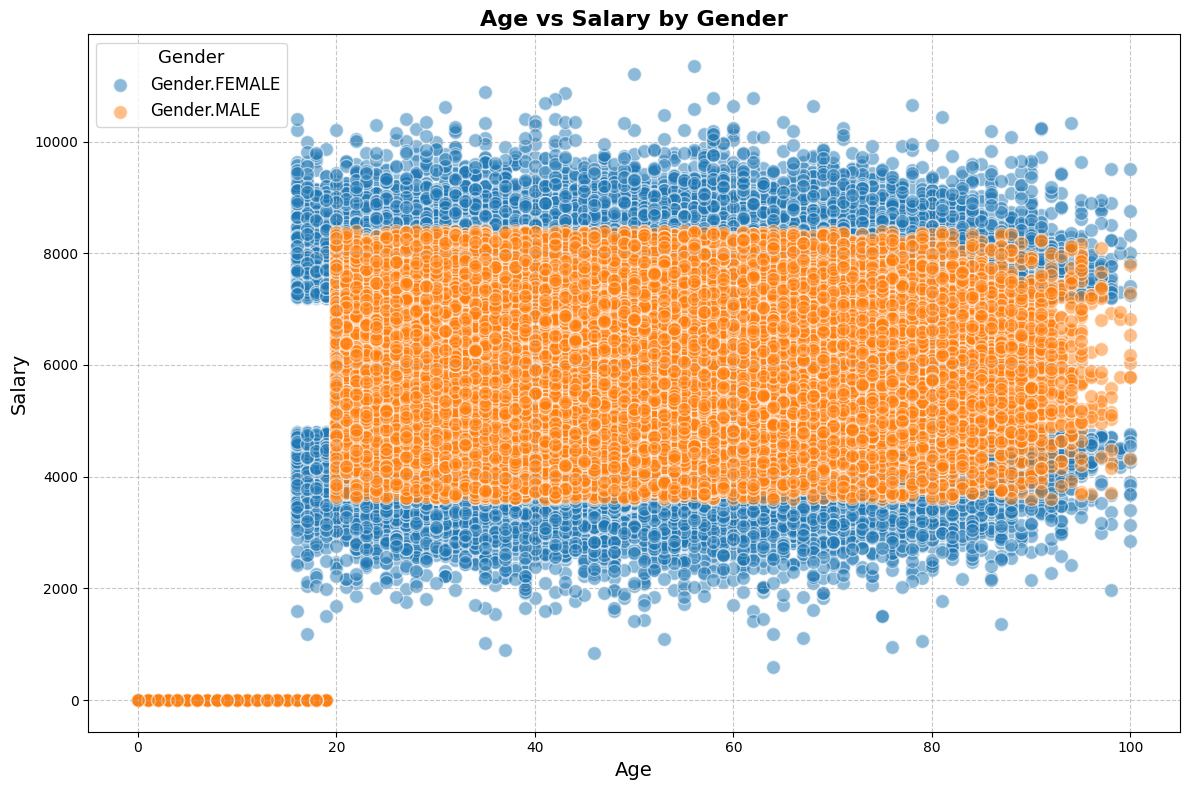

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Load real data
syndata = pd.read_csv("../data/sample_level_2_100k.csv", delimiter=";")

# Plot age vs salary and color both genders differently
plt.figure(figsize=(12, 8))
for gender, color in zip(
    [
        "Gender.FEMALE",
        "Gender.MALE",
    ],
    ["#1f77b4", "#ff7f0e"],
):
    subset = syndata[syndata["gender"] == gender]
    plt.scatter(
        subset["age"],
        subset["salary"],
        c=color,
        label=gender,
        alpha=0.5,
        edgecolors="w",
        s=100,
    )

plt.xlabel("Age", fontsize=14)
plt.ylabel("Salary", fontsize=14)
plt.title("Age vs Salary by Gender", fontsize=16, fontweight="bold")
plt.legend(title="Gender", fontsize=12, title_fontsize="13")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
